In [13]:
import pandas as pd
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
# from sklearn.tree import export_graphviz
# import graphviz

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [14]:
base = pd.read_csv('insurance.csv')
base

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,Mileage,Antilock,DrivingSkill,SeniorTrain,ThisCarCost,Theft,CarValue,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,TwentyThou,False,SubStandard,False,TenThou,False,FiveThou,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,Normal,TwentyThou,False,Normal,True,Thousand,False,TenThou,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,Excellent,Domino,True,Normal,False,Thousand,False,TwentyThou,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,Normal,FiftyThou,False,Normal,False,Thousand,False,FiveThou,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,FiftyThou,False,SubStandard,False,TenThou,False,FiveThou,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,TwentyThou,False,SubStandard,False,Thousand,False,FiveThou,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,Normal,FiftyThou,False,Normal,False,Thousand,False,FiveThou,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,Excellent,Domino,True,Expert,False,Thousand,False,FiftyThou,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,Excellent,TwentyThou,False,Expert,False,Thousand,False,FiveThou,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [15]:
base = base.drop(columns=['Unnamed: 0'])
base

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,Mileage,Antilock,DrivingSkill,SeniorTrain,ThisCarCost,Theft,CarValue,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,TwentyThou,False,SubStandard,False,TenThou,False,FiveThou,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,Normal,TwentyThou,False,Normal,True,Thousand,False,TenThou,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,Excellent,Domino,True,Normal,False,Thousand,False,TwentyThou,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,Normal,FiftyThou,False,Normal,False,Thousand,False,FiveThou,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,FiftyThou,False,SubStandard,False,TenThou,False,FiveThou,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,TwentyThou,False,SubStandard,False,Thousand,False,FiveThou,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,Normal,FiftyThou,False,Normal,False,Thousand,False,FiveThou,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,Excellent,Domino,True,Expert,False,Thousand,False,FiftyThou,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,Excellent,TwentyThou,False,Expert,False,Thousand,False,FiveThou,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [16]:
base.iloc[:, 7] = base.iloc[:, 7].fillna('NoDamage')

y = base.iloc[:, 7].values
x = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values

In [17]:
labelencoder = LabelEncoder()

# Transformando os valores categóricos em numéricos

for i in range(x.shape[1]):
  if x[:, i].dtype == 'object':
    x[:, i] = labelencoder.fit_transform(x[:, i])

In [18]:
# x variavel independentes
# y variavel dependente

x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [19]:
# 94
# model = RandomForestClassifier(n_estimators=500, random_state=1)
# 93
model = RandomForestClassifier(n_estimators=500, random_state=1, max_depth=8,max_leaf_nodes=8)

model.fit(x_training, y_training)

RandomForestClassifier(max_depth=8, max_leaf_nodes=8, n_estimators=500,
                       random_state=1)

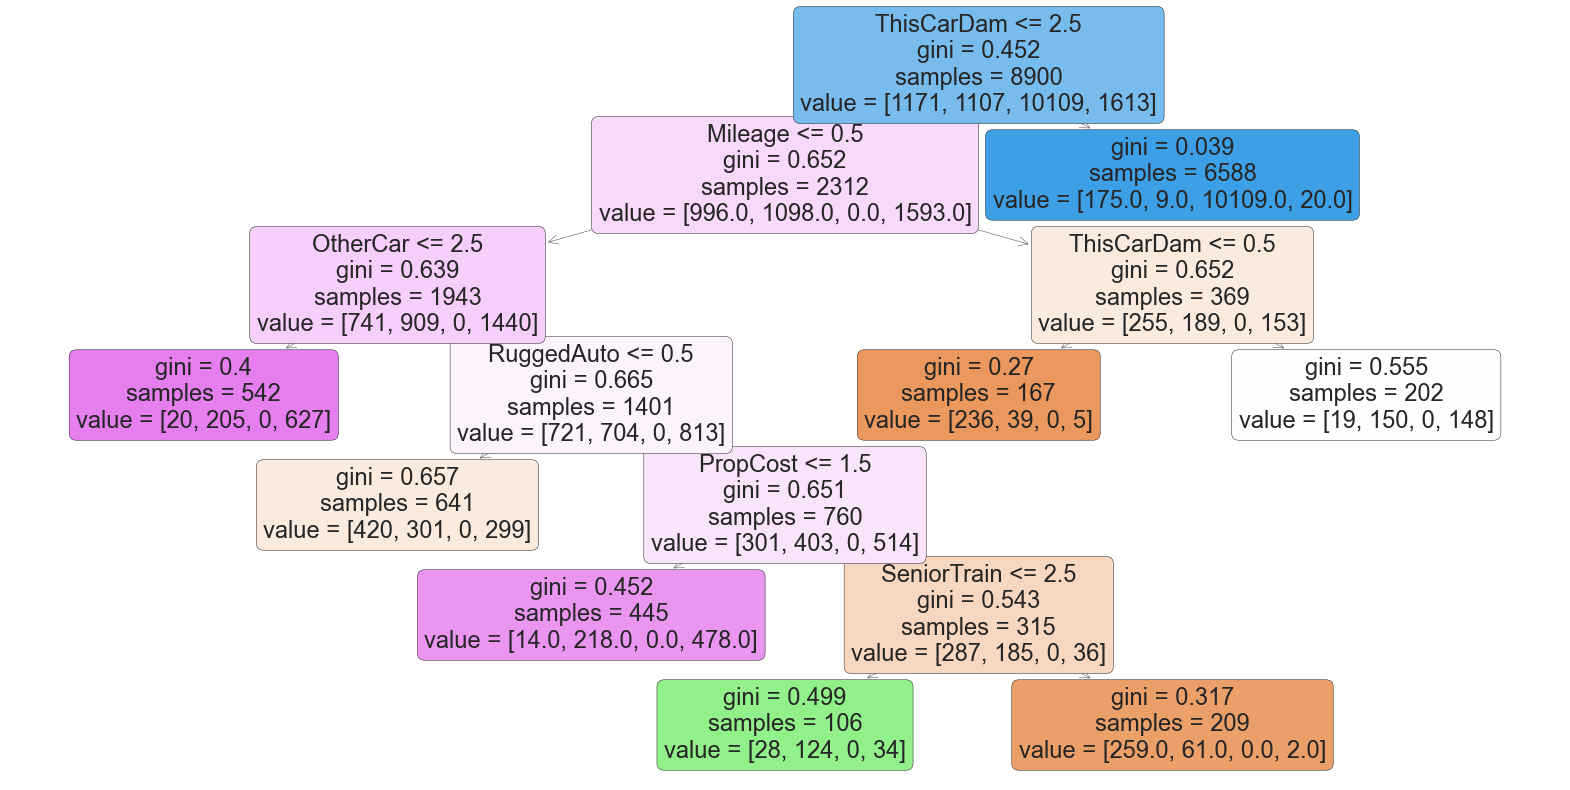

In [20]:
# visualization
tree_index = 0
tree_to_visualize = model.estimators_[tree_index]
plt.figure(figsize=(20,10))
plot_tree(tree_to_visualize, filled=True, rounded=True, feature_names=base.columns[:-1])
plt.show()

In [21]:
prediction = model.predict(x_test)
prediction

array(['NoDamage', 'NoDamage', 'NoDamage', ..., 'NoDamage', 'Mild',
       'NoDamage'], shape=(6000,), dtype=object)

In [22]:
accuracy = accuracy_score(y_test, prediction)

precision_score_value = precision_score(y_test, prediction, average='weighted')

recall = recall_score(y_test, prediction, average='weighted')

f1 = f1_score(y_test, prediction, average='weighted')

print(f'accuracy: {accuracy}, precision: {precision_score_value}, recall: {recall}, f1: {f1}')

accuracy: 0.9331666666666667, precision: 0.9295247182767501, recall: 0.9331666666666667, f1: 0.9292106098716731


In [23]:
report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

        Mild       0.85      0.68      0.75       542
    Moderate       0.78      0.62      0.69       505
    NoDamage       0.97      1.00      0.99      4228
      Severe       0.85      0.95      0.90       725

    accuracy                           0.93      6000
   macro avg       0.86      0.81      0.83      6000
weighted avg       0.93      0.93      0.93      6000

